In [1]:
import pandas as pd
from IPython.display import display

dataset_train = pd.read_csv('train.csv')
display(dataset_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# 查看训练集各特征的缺失情况
for column in dataset_train.columns:
    print('%-15s%-10.4f%-3d' % (column, dataset_train[column].count() / len(dataset_train), dataset_train[column].count()))

PassengerId    1.0000    891
Survived       1.0000    891
Pclass         1.0000    891
Name           1.0000    891
Sex            1.0000    891
Age            0.8013    714
SibSp          1.0000    891
Parch          1.0000    891
Ticket         1.0000    891
Fare           1.0000    891
Cabin          0.2290    204
Embarked       0.9978    889


In [3]:
# 删除PassengerId, Name, Ticket, Cabin特征
dataset_train = dataset_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
display(dataset_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
# 用训练集Age一列的平均数填补Age缺失值
dataset_train['Age'] = dataset_train['Age'].fillna(dataset_train['Age'].mean())
# 去除训练集中有缺失值的样本
dataset_train.dropna(axis=0,inplace=True)
display(dataset_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [5]:
# K折交叉验证
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = dataset_train.drop(columns=['Survived'])
y = dataset_train['Survived']

# 使用特征转换器
vec = DictVectorizer(sparse=False)
X = vec.fit_transform(X.to_dict(orient='record'))
print(vec.feature_names_)

dtc = DecisionTreeClassifier()
score = cross_val_score(dtc, X, y, cv=10)
print(score)
print(score.mean())

['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']
[0.71910112 0.80898876 0.73033708 0.79775281 0.82022472 0.76404494
 0.80898876 0.74157303 0.82022472 0.79545455]
0.7806690500510725


In [6]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (711, 10)
y_train shape: (711,)
X_test shape: (178, 10)
y_test shape: (178,)


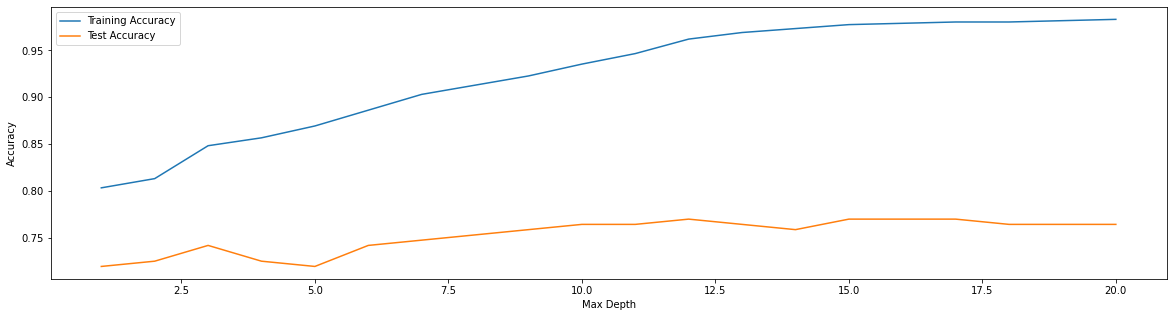

In [7]:
# 通过曲线来判断最佳参数
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
for i in range(20):
    dtc = DecisionTreeClassifier(max_depth=i+1, random_state=0)
    dtc.fit(X_train, y_train)
    training_accuracy.append(dtc.score(X_train, y_train))
    test_accuracy.append(dtc.score(X_test, y_test))

plt.figure(figsize=[20, 5])
plt.plot(range(1, 21), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [8]:
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier(max_depth=16, random_state=0)
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)
print(y_predict)

print('Training set score: {:.2f}'.format(dtc.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(dtc.score(X_test, y_test)))
print(classification_report(y_predict, y_test, target_names=['died', 'survived']))

[0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1]
Training set score: 0.98
Test set score: 0.77
              precision    recall  f1-score   support

        died       0.86      0.78      0.81       116
    survived       0.64      0.76      0.70        62

    accuracy                           0.77       178
   macro avg       0.75      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



In [9]:
dataset_test = pd.read_csv('test.csv')
dataset_test = dataset_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 用测试集Fare一列的众数填补Fare缺失值
dataset_test['Fare'] = dataset_test['Fare'].fillna(dataset_test['Fare'].dropna().mode()[0])
# 用测试集Age一列的平均数填补Age缺失值
dataset_test['Age'] = dataset_test['Age'].fillna(dataset_test['Age'].mean())

# 使用特征转换器
vec = DictVectorizer(sparse=False)
dataset_test = vec.fit_transform(dataset_test.to_dict(orient='record'))

In [10]:
y_predict = dtc.predict(dataset_test)
print(y_predict)

[0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 1]


In [11]:
import numpy as np

dataset_answer = pd.read_csv('gender_submission.csv').drop(columns=['PassengerId'])
answer = np.array(dataset_answer['Survived'])
print(answer)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [12]:
print('Accuracy: {:.2f}'.format(list(answer == y_predict).count(True) / len(list(answer == y_predict))))

Accuracy: 0.84


In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
score = cross_val_score(rfc, X, y, cv=10)
print(score)
print(score.mean())

[0.74157303 0.78651685 0.75280899 0.80898876 0.8988764  0.83146067
 0.80898876 0.7752809  0.85393258 0.84090909]
0.8099336057201226


0.8144279877425944 73


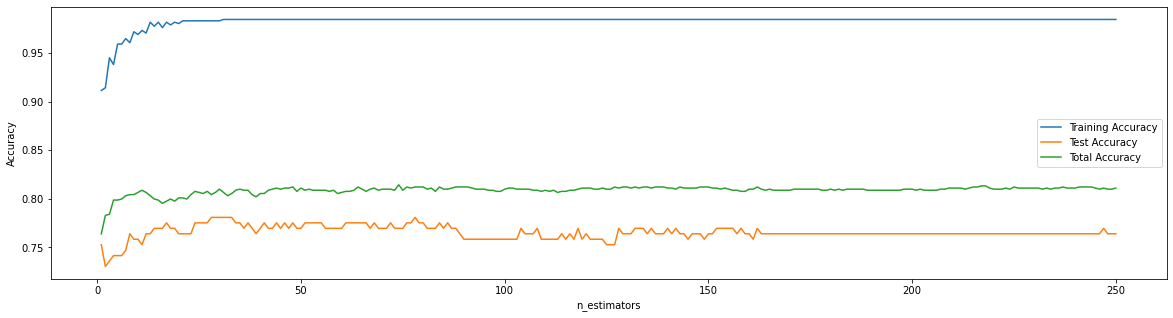

In [22]:
training_accuracy = []
test_accuracy = []
total_accuracy = []
for i in range(250):
    rfc = RandomForestClassifier(n_estimators=i+1, random_state=0)
    rfc.fit(X_train, y_train)
    training_accuracy.append(rfc.score(X_train, y_train))
    test_accuracy.append(rfc.score(X_test, y_test))
    total_accuracy.append(cross_val_score(rfc, X, y, cv=10).mean())

print(max(total_accuracy), total_accuracy.index(max(total_accuracy)))
plt.figure(figsize=[20, 5])
plt.plot(range(1, 251), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 251), test_accuracy, label='Test Accuracy')
plt.plot(range(1, 251), total_accuracy, label='Total Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [23]:
rfc = RandomForestClassifier(n_estimators=73, random_state=0)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
print(y_predict)

print('Training set score: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(rfc.score(X_test, y_test)))
print(classification_report(y_predict, y_test, target_names=['died', 'survived']))

[1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1]
Training set score: 0.98
Test set score: 0.77
              precision    recall  f1-score   support

        died       0.86      0.78      0.81       116
    survived       0.64      0.76      0.70        62

    accuracy                           0.77       178
   macro avg       0.75      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



In [24]:
y_predict = rfc.predict(dataset_test)
print(y_predict)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [25]:
print(answer)
print('Accuracy: {:.2f}'.format(list(answer == y_predict).count(True) / len(list(answer == y_predict))))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Accuracy: 0.83
